## 深度学习  
机器学习是人工智能领域的一个方法，神经网络是机器学习这个方法里的一类算法。  
深度学习就是使用深度架构（例如深度神经网络）的机器学习方法。  

隐藏层比较多（大于2）的神经网络叫深度神经网络。  
深层网络与浅层网络相比，表达力更强。  
仅有一个隐藏层的神经网络虽已能拟合任何一个函数，但它需要大量的神经元。而深层网络用少得多的神经元能拟合同样的函数，往往更节约资源。  
深层网络不容易训练，需要大量的数据和很多的技巧才能训练好一个深层网络。  

## 感知器  
神经网络的组成单元叫神经元，也叫做**感知器**。  
下图是一个感知器:  

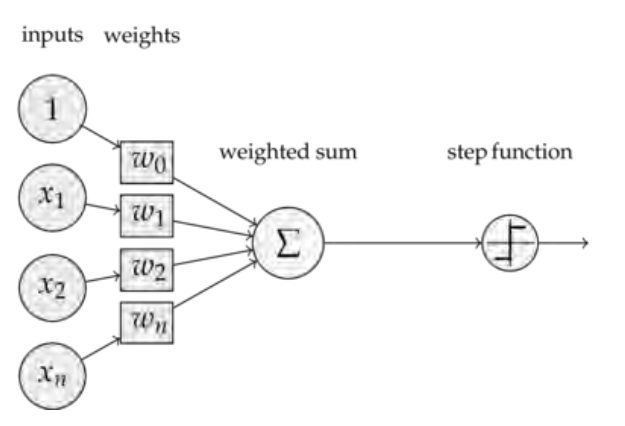
<style>
    img[alt="感知器.png"]{
        height:240px;
        
    }
</style>
一个感知器包括输入权值、激活函数与输出 **y = f ( w · x + b )**

感知器可以拟合任何**线性函数**，任何线性分类或线性回归问题都可以用感知器来解决。  
感知器不能实现异或运算。

### 感知器的训练
将权重项和偏置项初始化为0，利用下面的感知器规则迭代修改权重，直到训练完成。  

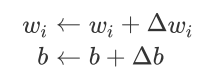  

其中：  

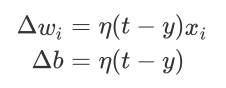  
<style>
    img[alt="感知器2.png"]{
        width:150px;
        
    }
    img[alt="感知器3.png"]{
        width:150px;
        
    }
</style>
wi是与输入xi对应的权重项，b是偏置项（可看作是值永远为1的输入所对应的权重）。  
t是训练样本的实际值，一般称作label。y是感知器的输出值。  
η是一个称作学习速率的常数，作用是控制每一步调整权的幅度。

每次从训练数据中取出一个样本的输入向量x，使用感知器计算其输出y，再根据上面的规则来调整权重。  
**每处理一个样本就调整一次权重**。经过**多轮迭代**后（即全部的训练数据被反复处理多轮），就可以训练出感知器的权重，使之实现目标函数。

In [10]:
# 编程实战：实现感知器
from functools import reduce

# 感知器类
class Perceptron(object):
    def __init__(self, input_num, activator):
        '''
        初始化感知器，设置输入参数的个数，以及激活函数。
        激活函数的类型为double -> double
        '''
        self.activator = activator
        self.weights = [0.0 for _ in range(input_num)]
        self.bias = 0.0

    def __str__(self):
        '''
        打印学习到的权重、偏置
        '''
        return 'weights\t:%s\nbias\t:%f\n' % (self.weights, self.bias)

    def predict(self, input_vec):
        '''
        输入向量，输出感知器的计算结果
        '''
        # 把input_vec[x1, x2, ...]和weights[w1, w2, ...]打包在一起变成[(x1, w1), (x2, w2), ...]
        # 利用map函数计算[x1 * w1, x2 * w2, ...]
        # 最后利用reduce求和
        # return self.activator(reduce(lambda a,b: a+b, map(lambda (x,w): x*w, zip(input_vec, self.weights)), 0.0) + self.bias)
        return self.activator(reduce(lambda a,b: a+b, list(map(lambda x, w: x*w, input_vec, self.weights)), 0.0) + self.bias)

    def train(self, input_vecs, lables, iteration, rate):
        '''
        输入训练数据：一组向量、对应的lable、训练轮数、学习率
        '''
        for i in range(iteration):
            self._one_iteration(input_vecs, lables, rate)

    def _one_iteration(self, input_vecs, lables, rate):
            '''
            一次迭代，把所有训练数据过一遍
            '''
            # 把输入和输出打包成训练样本的列表[(input_vec, lable), ...]
            samples = zip(input_vecs, lables)
            # 对每个样本按照规则更新权重
            for (input_vec, lable) in samples:
                output = self.predict(input_vec)
                self._updata_weights(input_vec, output, lable, rate)
    
    def _updata_weights(self, input_vec, output, lable, rate):
        '''
        按照感知器规则更新权重
        '''
        # 把input_vec[x1,x2,x3,...]和weights[w1,w2,w3,...]打包在一起变成[(x1,w1),(x2,w2),(x3,w3),...]
        # 然后利用感知器规则更新权重
        delta = lable - output
        # self.weights = map(lambda (x,w): w+rate*delta*x, zip(input_vec, self.weights))
        self.weights = list(map(lambda x,w: w+rate*delta*x, input_vec, self.weights))
        self.bias += rate * delta



# 实现 and 函数
def f(x):
    '''
    定义激活函数f
    '''
    return 1 if x > 0 else 0

def get_training_dataset():
    '''
    基于and真值表构造训练数据
    '''
    input_vecs = [[1,1], [0,0], [1,0], [0,1]]
    lables = [1, 0, 0, 0]
    return input_vecs, lables

def train_and_perceptron():
    '''
    使用and真值表训练感知器
    '''
    p = Perceptron(2, f)
    input_vecs, lables = get_training_dataset()
    p.train(input_vecs, lables, 10, 0.1)
    # 返回训练好的感知器
    return p


if __name__ == '__main__':
    # 训练and感知器
    and_perceptron = train_and_perceptron()
    # 打印训练获得的权重
    print(and_perceptron)
    # 测试
    print('1 and 1 = %d' % and_perceptron.predict([1, 1]))
    print('0 and 0 = %d' % and_perceptron.predict([0, 0]))
    print('1 and 0 = %d' % and_perceptron.predict([1, 0]))
    print('0 and 1 = %d' % and_perceptron.predict([0, 1]))



weights	:[0.1, 0.2]
bias	:-0.200000

1 and 1 = 1
0 and 0 = 0
1 and 0 = 0
0 and 1 = 0


## 线性单元
当数据集**不是线性可分**的时候，“感知器规则”可能无法收敛，无法完成一个感知器的训练。  
为了解决这个问题，可用一个**可导的线性函数**来替代感知器的阶跃函数，这种感知器就叫做**线性单元**。  
线性单元在面对线性不可分的数据集时，会收敛到一个最佳的近似上。  

线性单元如下图所示:  

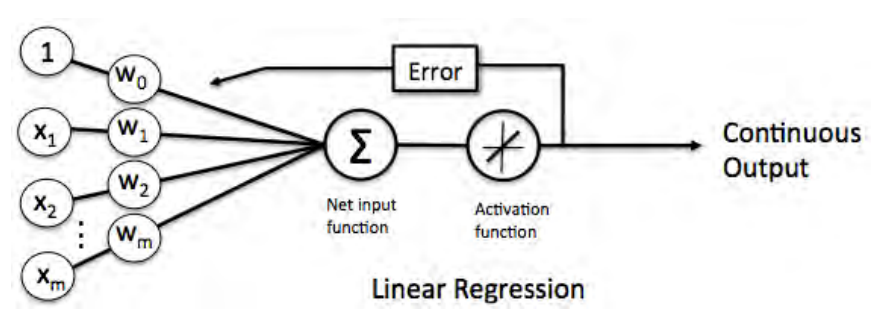
<style>
    img[alt="线性单元.png"]{
        height:230px;
        
    }
</style>

对比之前的感知器，替换了激活函数f之后，线性单元将返回一个实数值而不是0, 1分类。因此线性单元用来解决**回归问题**而不是分类问题。

### 线性单元的模型  
谈到模型时，我们实际上在谈论根据输入x预测输出y的算法。  

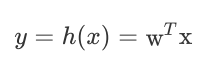
<style>
    img[alt="线性单元2.png"]{
        height:45px;
        
    }
</style>

长成这种样子模型就叫做线性模型，因为输出y就是输入特征x1, x2, x3, ...的线性组合。


### 监督学习和无监督学习  
监督学习：每个训练样本既包括输入特征x，也包括对应的输出y。当模型看到足够多的样本之后，就能总结出一些规律，就可以预测那些它没看过的输入所对应的答案了。  
无监督学习：训练样本中只有x而没有y。模型可以总结出特征x的一些规律，但是无法知道其对应的答案y。  

很多时候，既有x又有y的训练样本是很少的，大部分样本都只有x。

### 线性单元的目标函数  
在监督学习下，对于一个样本，我们知道特征x以及标记y。同时，我们还可以根据模型h(x)计算得到输出y'。  
我们希望模型计算出来的y'和y越接近越好。  

数学上有很多方法来表示的y'和y的接近程度，比如我们可以用y'和y的差的平方的1/2来表示它们的接近程度:  

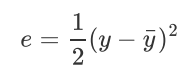

e叫做单个样本的误差。乘1/2是为了后面计算方便。  
我们可以用训练数据中所有样本的误差的和，来表示模型的误差E:

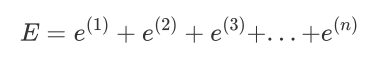

其中：  

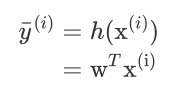

我们希望对于一个训练数据集来说，误差最小越好。对于特定的训练数据集来说，(x(i), y(i))的值都是已知的，所以E其实是参数w的函数:

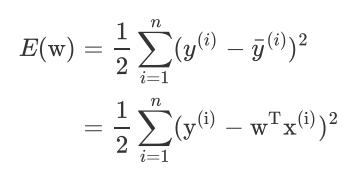
<style>
    img[alt="线性单元3.png"]{
        height:50px;
        
    }
    img[alt="线性单元4.png"]{
        height:40px;
        
    }
    img[alt="线性单元5.png"]{
        height:65px;
        
    }
    img[alt="线性单元6.png"]{
        height:110px;
        
    }
</style>

模型的训练，实际上就是求取到合适的w，使E取得最小值，这在数学上称作**优化问题**。而E(w)就是我们优化的目标，称之为**目标函数**。  

### 梯度下降优化算法  
----一步一步把函数的极值点试出来。

梯度是一个向量，它指向函数值上升最快的方向。梯度的反方向就是函数值下降最快的方向。  
每次都向函数y=f(x)的梯度的相反方向来修改x，最终就能走到函数的最小值附近。  

步长如果选择小了，会迭代很多轮才能走到最小值附近；如果选择大了，那可能就会越过最小值很远，收敛不到一个好的点上。

梯度下降算法的公式:  

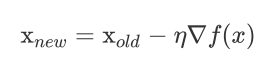  
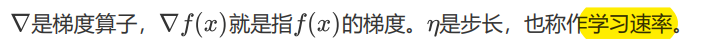

如果要求目标函数的最大值，就应该用梯度上升算法：  

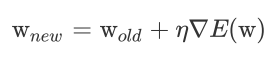

E(w)的梯度是：  

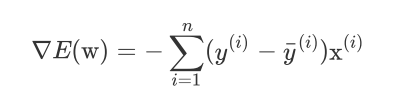

线性单元的参数修改规则：  

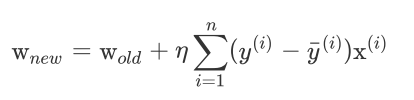
<style>
    img[alt="梯度下降.png"]{
        height:45px;
        
    }
    img[alt="梯度下降2.png"]{
        height:30px;
        
    }
    img[alt="梯度下降3.png"]{
        height:50px;
        
    }
    img[alt="梯度下降4.png"]{
        height:65px;
        
    }
    img[alt="梯度下降5.png"]{
        height:70px;
        
    }
</style>

如果每个样本有M个特征，则上式中的x, w都是M+1维向量，y是标量。

### 随机梯度下降算法（SGD）  
若根据上述规则训练模型，每次更新w，要遍历训练数据中所有的样本进行计算。我们称这种算法为批梯度下降（BGD）。  
如果样本量非常大，计算量会异常巨大。 

更实用的算法是SGD算法。在SGD算法中，每次更新w的迭代，只计算一个样本。这样对于一个具有数百万样本的训练数据，完成一次遍历就会对w更新数百万次，效率大大提升。  

由于样本的噪音和随机性，每次更新w并不一定按照减少E的方向。但大量的更新总体上是沿着减少E的方向上前进的，因此最后也能收敛到最小值附近。  

SGD不仅仅效率高，而且随机性有时候反而是好事。对于非凸函数来说，存在许多局部最小值。随机性有助于我们逃离某些很糟糕的局部最小值，获得一个更好的模型。  

In [11]:
# 实现线性单元
# 除了激活函数f不同之外，感知器和线性单元的模型和训练规则是一样的。
# 只需要把感知器的激活函数进行替换即可。

# 定义激活函数f
f = lambda x: x

class LinearUnit(Perceptron):
    def __init__(self, input_num):
        Perceptron.__init__(self, input_num, f)

# 测试
def get_training_dataset():
    '''
    捏造5人的收入数据，构建训练数据
    '''
    # 输入向量列表，每一项是工作年限
    input_vecs = [[5], [3], [8], [1.4], [10.1]]
    # 期望的输出列表，月薪，注意要与输入一一对应
    labels = [5500, 2300, 7600, 1800, 11400]
    return input_vecs, labels

def train_linear_unit():
    '''
    使用数据训练线性单元
    '''
    # 创建感知器，输入参数的特征数为1（工作年限）
    lu = LinearUnit(1)
    # 训练，迭代10轮, 学习速率为0.01
    input_vecs, labels = get_training_dataset()
    lu.train(input_vecs, labels, 10, 0.01)
    #返回训练好的线性单元
    return lu

if __name__ == '__main__':
    # 训练线性单元
    linear_unit = train_linear_unit()
    # 打印训练获得的权重
    print(linear_unit)
    # 测试
    print('Work 3.4 years, monthly salary = %.2f' % linear_unit.predict([3.4]))
    print('Work 15 years, monthly salary = %.2f' % linear_unit.predict([15]))
    print('Work 1.5 years, monthly salary = %.2f' % linear_unit.predict([1.5]))
    print('Work 6.3 years, monthly salary = %.2f' % linear_unit.predict([6.3]))

weights	:[1124.0634970262222]
bias	:85.485289

Work 3.4 years, monthly salary = 3907.30
Work 15 years, monthly salary = 16946.44
Work 1.5 years, monthly salary = 1771.58
Work 6.3 years, monthly salary = 7167.09


实际上，一个机器学习算法只有两部分：  
**模型h(x)**与**目标函数**  
目标函数取最小(最大)值时所对应的参数值，就是模型的参数的最优值。很多时候我们只能获得目标函数的局部最小(最大)值，因此也只能得到模型参数的局部最优值。  
接下来，用**优化算法**去求取目标函数的最小(最大)值。  
[随机]梯度{下降|上升}算法就是一个优化算法。针对同一个目标函数，不同的优化算法会推导出不同的训练规则。  

其实在机器学习中，算法往往并不是关键，真正的关键之处在于**特征选取**。  
而神经网络算法的一个优势，就在于它能够自动学习到应该提取什么特征。

## 神经元
神经元和感知器本质上是一样的。只不过感知器的激活函数是阶跃函数，神经元的激活函数往往选择为sigmoid函数或tanh函数。  
输出y：  

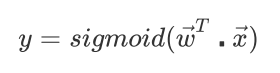  
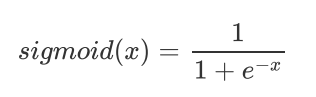

sigmoid函数是一个非线性函数，值域是(0,1)。函数图像如下图所示：  

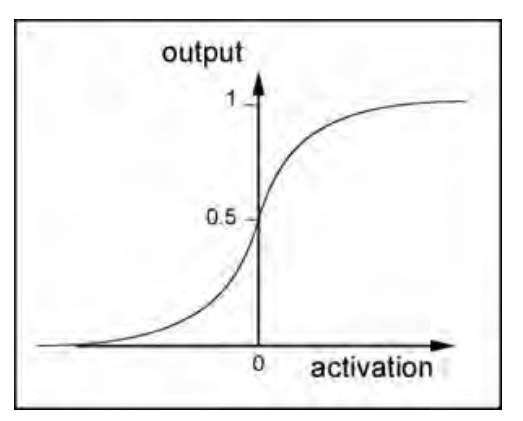
<style>
    img[alt="神经元.png"]{
        height:50px;
    }
    img[alt="神经元2.png"]{
        height:55px;  
    }
    img[alt="神经元3.png"]{
        height:230px;        
    }
</style>

sigmoid函数的导数是：  
令 y = sigmoid(x), 则 y′ = y(1 − y)  
sigmoid函数的导数可以用sigmoid函数自身来表示。  

## 神经网络  
神经网络其实就是按照一定规则连接起来的多个神经元。  
全连接(full connected, FC) 神经网络：  
* 由输入层、隐藏层、输出层组成；  
* 同一层的神经元之间没有连接；  
* **第N层的每个神经元和第N-1层的所有神经元相连**，第N-1层神经元的输出就是第N层神经元的输入；  
* 每个连接都有一个权值。  

不同结构的神经网络具有不同的连接规则。

### 神经网络的输出
神经网络实际上就是一个输入向量x到输出向量y的**函数**。  
首先将输入向量x的每个元素xi的值赋给神经网络的输入层的对应神经元，然后依次向前计算每一层的每个神经元的值。直到最后一层输出层的所有神经元的值计算完毕，最后将输出层每个神经元的值串在一起就得到了输出向量y。

输入向量的**维度**和输入层**神经元个数**相同，而输入向量的某个元素对应到哪个输入节点是可以自由决定的。  
在给权重wji编号时，我们把目标节点的编号j放在前面，把源节点的编号i放在后面。  
输出向量的维度和输出层神经元个数相同。  

### 神经网络的矩阵表示
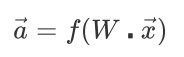
<style>
    img[alt="神经网络.png"]{
        height:40px;
    }
</style>

f是激活函数，W是某一层的权重矩阵，x是某层的输入向量，a是某层的输出向量。  
上式说明神经网络的每一层的作用实际上就是先将输入向量每个元素左乘一个数组进行**线性变换**，得到一个新的向量，然后再对这个向量逐元素应用一个**激活函数**。

### 神经网络的训练
一个神经网络的连接方式、网络的层数、每层的节点数这些参数，是人为事先设置的。对于这些人为设置的参数，我们称之为**超参数**。  

#### 反向传播算法  
我们以监督学习为例来解释反向传播算法，设神经元的激活函数f为sigmoid函数。  

假设每个训练样本为(x, t)，向量x是训练样本的特征，t是样本的目标值。  
首先，用样本的特征x，计算出神经网络中每个隐藏层节点的输出ai，以及输出层每个节点的输出yi。  
然后，我们按照下面的方法计算出每个节点的误差项δi：  
- 对于输出层节点i：  

  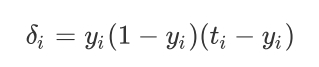  
- 对于隐藏层节点：  

  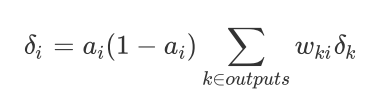  
ai是节点i的输出值，wki是节点i到它的下一层节点k的连接权重，δk是节点i的下一层节点k的误差项。

最后，更新每个连接上的权值： 

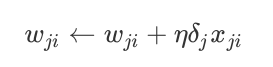  
wji是节点i到节点j的权重，η是一个成为学习速率的常数，δj是节点j的误差项，xji是节点i传递给节点j的输入。偏置项的输入值永远为1。  
<style>
    img[alt="反向传播.png"]{
        height:45px;
    }
    img[alt="反向传播2.png"]{
        height:60px;  
    }
    img[alt="反向传播3.png"]{
        height:50px;        
    }
</style>

计算一个节点的误差项，需要先计算每个与其相连的**下一层**节点的误差项。  
这就要求误差项的计算顺序必须是从输出层开始，然后反向依次计算每个隐藏层的误差项，直到与输入层相连的那个隐藏层。  
当所有节点的误差项计算完毕后，就可以更新所有的权重。  

**如果激活函数不同、误差计算方式不同、网络连接结构不同、优化算法不同，则具体的训练规则也会不一样。**  

### 神经网络的实现
实现一个基本的**全连接**神经网络。  
可以分解出**5**个领域对象来实现神经网络：  
- Network 神经网络对象，提供API接口。它由若干层对象组成以及连接对象组成。  
- Layer 层对象，由多个节点组成。   
- Node 节点对象计算和记录节点自身的信息(比如输出值a、误差项δ等)，以及与这个节点相关的上下游的连接。  
- Connection 每个连接对象都要记录该连接的权重。  
- Connections 仅仅作为Connection的集合对象，提供一些集合操作。  

In [ ]:
# Node

In [ ]:
# ConstNode对象，为了实现一个输出恒为1的节点(计算偏置wb时需要)

In [ ]:
# Layer对象，负责初始化一层。此外，作为Node的集合对象，提供对Node集合的操作

In [ ]:
# Connection对象，主要职责是记录连接的权重，以及这个连接所关联的上下游节点

In [ ]:
# Connections对象，提供Connection集合操作

In [ ]:
# Network对象，提供API

#### 梯度检查
可以利用梯度检查来确认程序**是否正确**（保证自己写的神经网络没有BUG）  

对于梯度下降算法：  

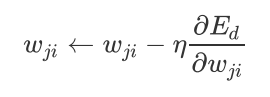  

关键之处在于偏导数的计算一定要正确。

可以设ε为一个很小的数（比如0.0001）  

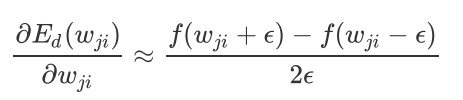  

利用上式来计算偏导数的值，然后同我们神经网络代码中计算出来的梯度值进行比较。如果两者的差别非常的小，那么就说明我们的代码是正确的。
<style>
    img[alt="梯度检查.png"]{
        height:60px;
    }
    img[alt="梯度检查2.png"]{
        height:70px;  
    }
</style>

如果我们想检查参数wji的梯度是否正确，我们需要以下几个步骤：  
1. 首先使用一个样本d对神经网络进行训练，这样就能获得每个权重的梯度。  
2. 将wji加上一个很小的值(0.0001)，重新计算神经网络在这个样本d下的Ed+。  
3. 将wji减上一个很小的值(0.0001)，重新计算神经网络在这个样本d下的Ed-。  
4. 根据上式计算出期望的梯度值，和第一步获得的梯度值进行比较，它们应该几乎相等(至少4位有效数字相同)。  

当然，我们可以重复上面的过程，对每个权重wji都进行检查。也可以使用多个样本重复检查。  

In [ ]:
def gradient_check(network, sample_feature, sample_label):